<a href="https://colab.research.google.com/github/ptran217/Fish-Identifier/blob/master/FishIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fish Identifier


In [0]:
!curl -s https://course.fast.ai/setup/colab | bash #Update fast.ai for the Colab jupyter

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

Use JavaScript to download image URLs

In [0]:
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
folder = 'flathead'
file = 'flathead.csv'

path = Path('data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'kingfish'
file = 'kingfish.csv'

path = Path('data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'luderick'
file = 'luderick.csv'

path = Path('data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'sand_whiting'
file = 'sand_whiting.csv'

path = Path('data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'silver_trevally'
file = 'silver_trevally.csv'

path = Path('data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'slimy_mackerel'
file = 'slimy_mackerel.csv'

path = Path('data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'snapper'
file = 'snapper.csv'

path = Path('data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'yellowfin_bream'
file = 'yellowfin_bream.csv'

path = Path('data/fish')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls

In [0]:
classes = ['flathead','kingfish','luderick','sand_whiting','silver_trevally','slimy_mackerel','snapper','yellowfin_bream']


In [0]:
download_images(path/file,dest,max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,
                                  ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['flathead',
 'kingfish',
 'luderick',
 'sand_whiting',
 'silver_trevally',
 'slimy_mackerel',
 'snapper',
 'yellowfin_bream']

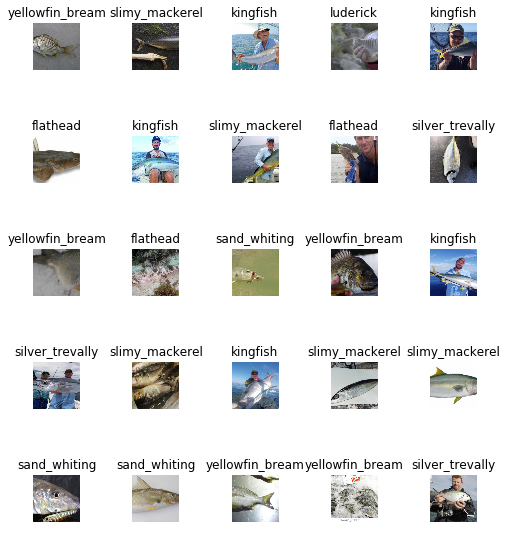

In [0]:
data.show_batch(rows=5, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['flathead',
  'kingfish',
  'luderick',
  'sand_whiting',
  'silver_trevally',
  'slimy_mackerel',
  'snapper',
  'yellowfin_bream'],
 8,
 870,
 217)

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.193695,1.309309,0.419355,00:12
1,1.582641,0.898575,0.299539,00:11
2,1.283389,0.831478,0.285714,00:11
3,1.106880,0.830894,0.285714,00:11


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


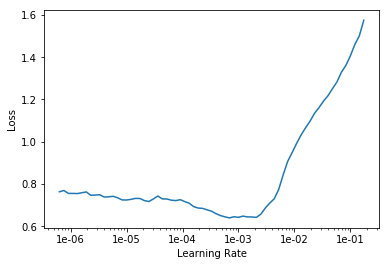

In [0]:
learn.recorder.plot()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

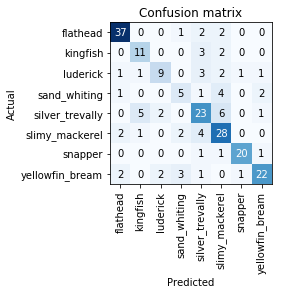

In [0]:
interp.plot_confusion_matrix()

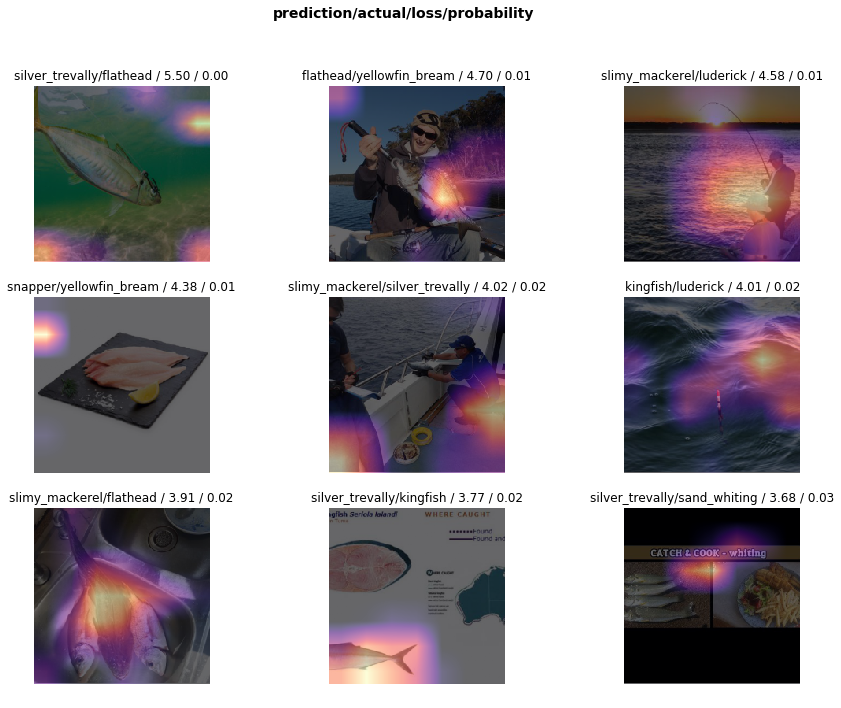

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=2)

[('silver_trevally', 'slimy_mackerel', 6),
 ('silver_trevally', 'kingfish', 5),
 ('sand_whiting', 'slimy_mackerel', 4),
 ('slimy_mackerel', 'silver_trevally', 4),
 ('kingfish', 'silver_trevally', 3),
 ('luderick', 'silver_trevally', 3),
 ('yellowfin_bream', 'sand_whiting', 3),
 ('flathead', 'silver_trevally', 2),
 ('flathead', 'slimy_mackerel', 2),
 ('kingfish', 'slimy_mackerel', 2),
 ('luderick', 'slimy_mackerel', 2),
 ('sand_whiting', 'yellowfin_bream', 2),
 ('silver_trevally', 'luderick', 2),
 ('slimy_mackerel', 'flathead', 2),
 ('slimy_mackerel', 'sand_whiting', 2),
 ('yellowfin_bream', 'flathead', 2),
 ('yellowfin_bream', 'luderick', 2)]

**Clean Up**

In [0]:
from fastai.widgets import *
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [0]:
fd = FileDeleter(file_paths=top_loss_paths)

NameError: ignored

In [0]:
db = (ImageList.from_folder(path)
                   .no_split()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:180: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")
